Import Libraries

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
from tqdm import tqdm
import random
warnings.filterwarnings('ignore')
%matplotlib inline
from PIL import Image
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


In [6]:
TRAIN_DIR = 'D:/Study material college/Minor Project Sem 6/archive/train/train/'
TEST_DIR = 'D:/Study material college/Minor Project Sem 6/archive/test/test/'

In [7]:
def load_dataset(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        
        # Skip non-directory items like .DS_Store
        if not os.path.isdir(label_path):
            continue

        for filename in os.listdir(label_path):
            image_path = os.path.join(label_path, filename)
            image_paths.append(image_path)
            labels.append(label)

        print(label, "Completed")

    return image_paths, labels

In [8]:
# Load dataset
image_paths, labels = load_dataset(TRAIN_DIR)

# Print summary
print(f"Total images loaded: {len(image_paths)}")
print(f"Classes found: {set(labels)}")

# Create DataFrame
train = pd.DataFrame({
    'image': image_paths,
    'label': labels
})

# Shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)

# Display top rows like in your screenshot
train.head()


angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed
Total images loaded: 28709
Classes found: {'surprise', 'disgust', 'happy', 'fear', 'angry', 'sad', 'neutral'}


,image,label
0,D:/Study material college/Minor Project Sem 6/...,happy
1,D:/Study material college/Minor Project Sem 6/...,sad
2,D:/Study material college/Minor Project Sem 6/...,angry
3,D:/Study material college/Minor Project Sem 6/...,happy
4,D:/Study material college/Minor Project Sem 6/...,neutral


In [9]:
# Load dataset
image_paths, labels = load_dataset(TEST_DIR)

# Print summary
print(f"Total images loaded: {len(image_paths)}")
print(f"Classes found: {set(labels)}")

# Create DataFrame
test = pd.DataFrame({
    'image': image_paths,
    'label': labels
})



# Display top rows like in your screenshot
test.head()


angry Completed
disgust Completed
fear Completed
happy Completed
neutral Completed
sad Completed
surprise Completed
Total images loaded: 7178
Classes found: {'surprise', 'disgust', 'happy', 'fear', 'angry', 'sad', 'neutral'}


,image,label
0,D:/Study material college/Minor Project Sem 6/...,angry
1,D:/Study material college/Minor Project Sem 6/...,angry
2,D:/Study material college/Minor Project Sem 6/...,angry
3,D:/Study material college/Minor Project Sem 6/...,angry
4,D:/Study material college/Minor Project Sem 6/...,angry


EDA

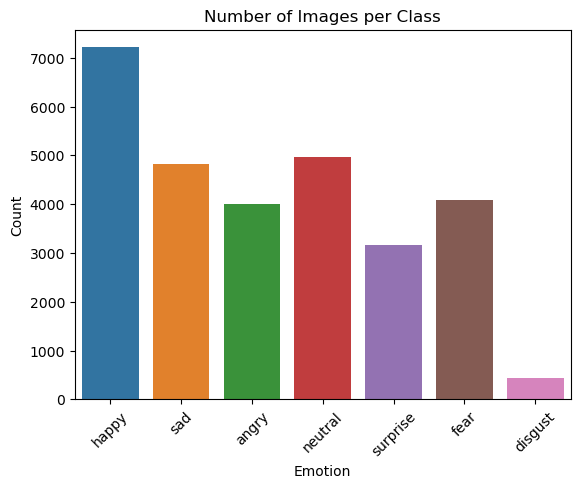

In [10]:
# Plot the distribution of labels
sns.countplot(x='label', data=train)

plt.title('Number of Images per Class')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

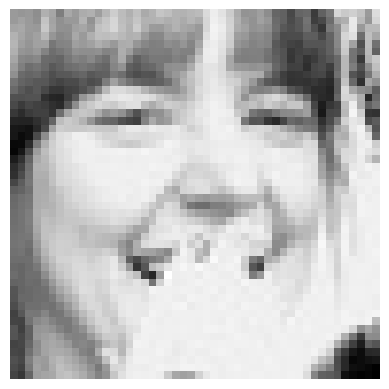

In [11]:
# Open the first image
img = Image.open(train['image'][0])

# Display it in grayscale
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

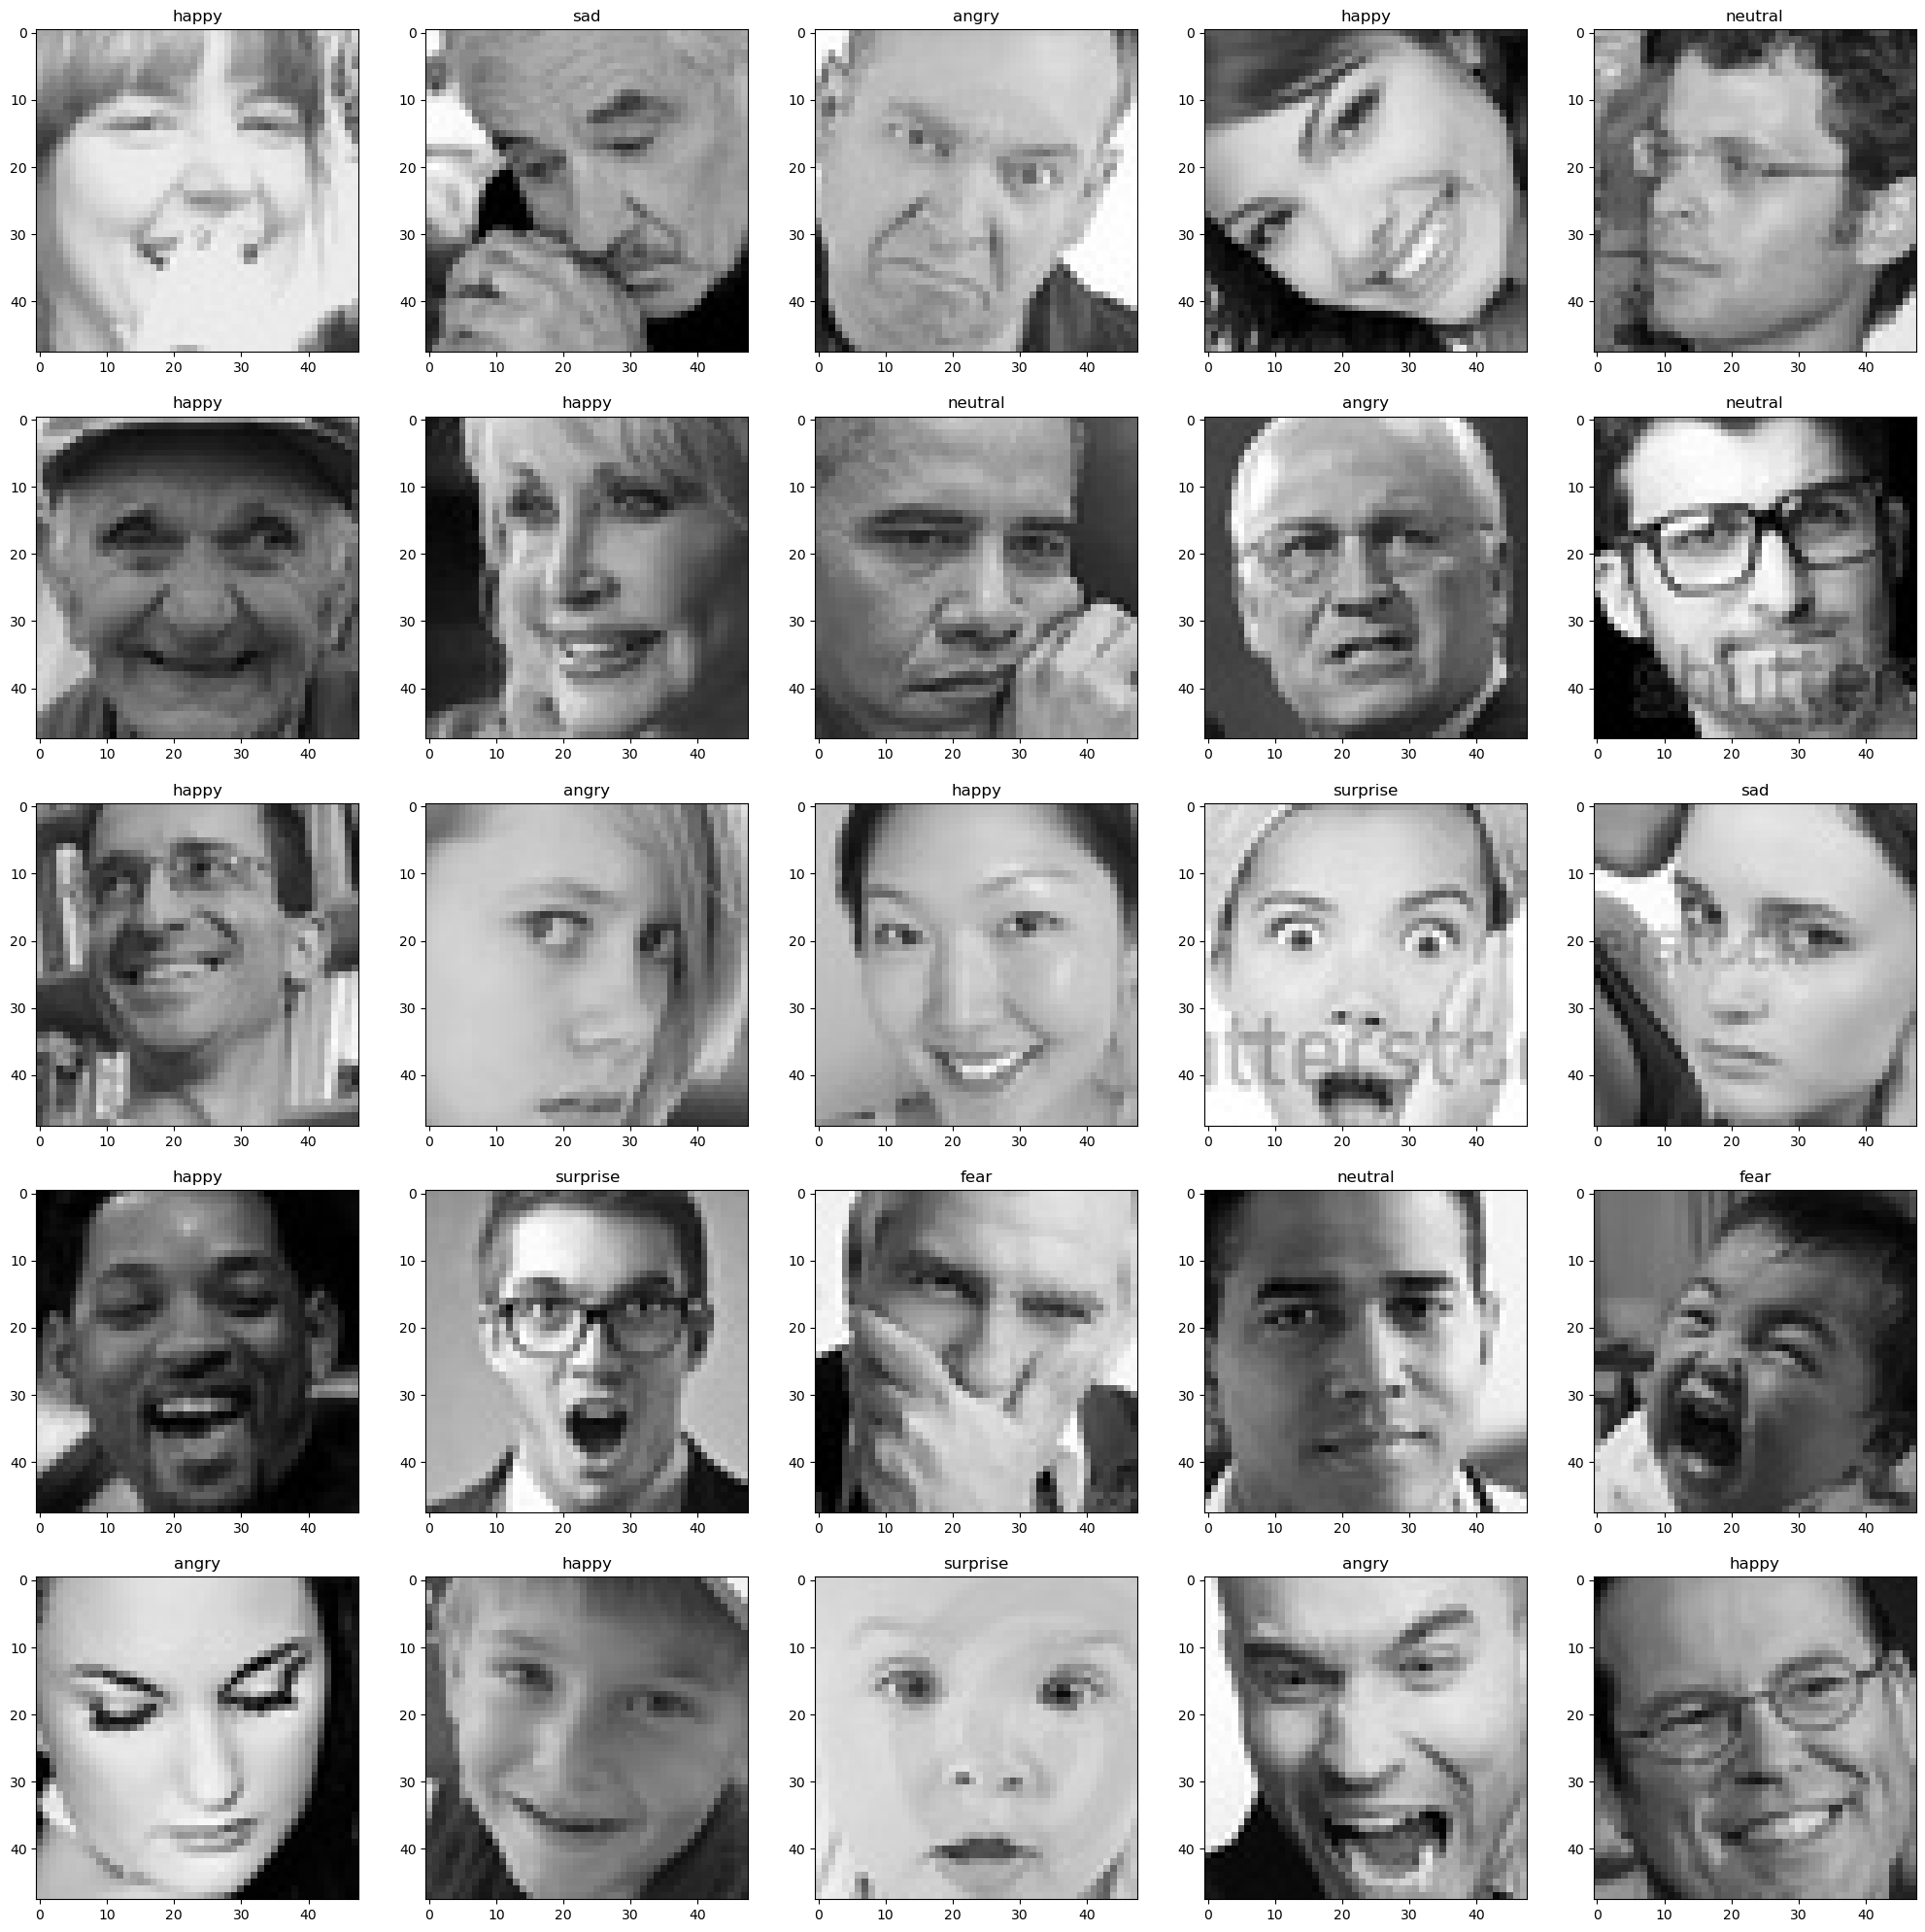

In [12]:
# Select first 25 images
plt.figure(figsize=(25, 25))
files = train.iloc[0:25]

# Loop through each image and plot
for index, file, label in files.itertuples():
    plt.subplot(5, 5, index + 1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)

In [13]:
def extract_features(images):
    features = []

    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)

    return features

In [14]:
def load_img(path, grayscale=False):
    img = Image.open(path)
    if grayscale:
        img = img.convert('L')
    return img

In [15]:
# Extract features from training images
train_features = extract_features(train['image'])


100%|██████████| 28709/28709 [03:43<00:00, 128.22it/s]


In [16]:
test_features = extract_features(test['image'])

100%|██████████| 7178/7178 [00:55<00:00, 128.53it/s]


In [17]:
# Normalize the image
x_train = train_features / 255.0
x_test = test_features / 255.0


In [18]:
# Convert label to integer
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train['label'])

y_train = le.transform(train['label'])
y_test = le.transform(test['label'])


In [19]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)


In [20]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0.])

In [21]:
# config
input_shape = (48, 48, 1)
output_class = 7


In [22]:
# Build the model
model = Sequential()

# Conv Block 1
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Conv Block 2
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Conv Block 3
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Conv Block 4
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(output_class, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(
    x=x_train, 
    y=y_train, 
    batch_size=128, 
    epochs=200, 
    validation_data=(x_test, y_test)
)

Epoch 1/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 197s 866ms/step - accuracy: 0.2369 - loss: 1.8362 - val_accuracy: 0.2471 - val_loss: 1.8080
Epoch 2/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 160s 710ms/step - accuracy: 0.2540 - loss: 1.8016 - val_accuracy: 0.2503 - val_loss: 1.7907
Epoch 3/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 162s 719ms/step - accuracy: 0.2635 - loss: 1.7666 - val_accuracy: 0.3130 - val_loss: 1.6863
Epoch 4/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 161s 717ms/step - accuracy: 0.3253 - loss: 1.6809 - val_accuracy: 0.3866 - val_loss: 1.5587
Epoch 5/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 161s 714ms/step - accuracy: 0.3821 - loss: 1.5710 - val_accuracy: 0.4593 - val_loss: 1.4107
Epoch 6/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 161s 717ms/step - accuracy: 0.4211 - loss: 1.4803 - val_accuracy: 0.4671 - val_loss: 1.3833
Epoch 7/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 164s 728ms/step - accuracy: 0.4466 - loss: 1.4265 - val_accuracy: 0.4891 - val_loss: 1.3264
Epoch 8/200
225/225 ━━━━━━━━━━━━━━━━━━━━ 163s 726ms/step - accuracy: 

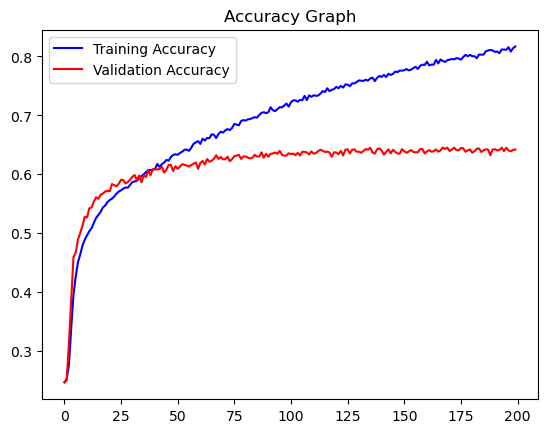

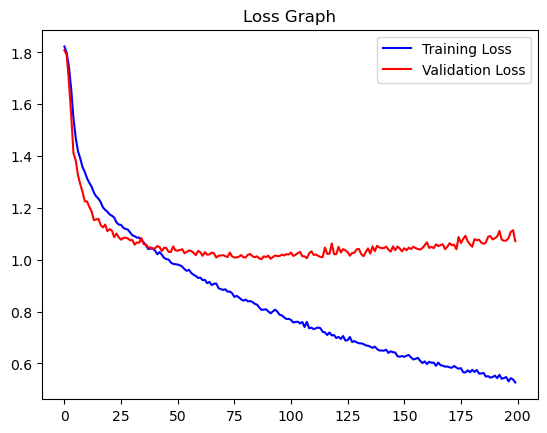

In [24]:
# Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()


Original Output: angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Predicted Output: angry


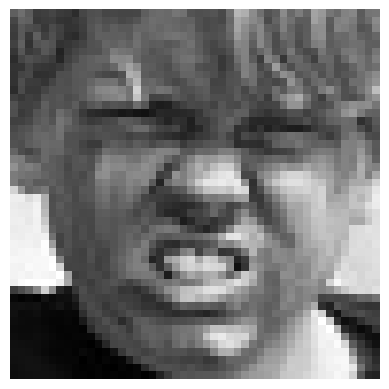

In [25]:
# Pick a random image from the test set
image_index = random.randint(0, len(test))

# Show the original label
print("Original Output:", test['label'][image_index])

# Predict using the trained model
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))

# Decode the predicted label
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)

# Show the image
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray')
plt.axis('off')
plt.show()

In [26]:
import pickle

In [27]:
with open('D:/Study material college/Minor Project Sem 6/model.pkl', 'wb') as f:
    pickle.dump(model, f)
